# Military Power Clustering Project
-World military power
Source : globalfirepower.com on 1st may 2020

- https://data.world/vizzup/world-military-power/workspace/file?filename=World+military+power.xlsx


# Import Libraries

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
plt.rcParams["figure.figsize"] = (10,6)
import warnings
warnings.filterwarnings('ignore')
#pd.set_option('display.max_rows', 500)

# Ingest Data  

In [50]:
df = pd.read_excel("World military power.xlsx", header=[0,1])
df.head()

2020 ranking                               Airforce Strength  \
  Military Strength Military Strength Power Index Aircraft Strength   
0       Afghanistan                        1.3444       Afghanistan   
1           Albania                        2.3137           Albania   
2           Algeria                        0.4659           Algeria   
3            Angola                        0.8379            Angola   
4         Argentina                        0.6521         Argentina   

                                                        \
  Aircraft Strength value Fighter/Interceptor Strength   
0                   260.0                  Afghanistan   
1                    19.0                      Albania   
2                   551.0                      Algeria   
3                   295.0                       Angola   
4                   227.0                    Argentina   

                                                               \
  Fighter/Interceptor Strength value Attack Aircraft Strength   
0                                0.0              Afghanistan   
1                                0.0                  Albania   
2                              103.0                  Algeria   
3                               72.0                   Angola   
4                               24.0                Argentina   

                                                                    \
  Attack Aircraft Strength value Transport Aircraft Fleet Strength   
0                           25.0                       Afghanistan   
1                            0.0                           Albania   
2                           22.0                           Algeria   
3                           18.0                            Angola   
4                            7.0                         Argentina   

                                           ...         Manpower  \
  Transport Aircraft Fleet Strength value  ... Total Population   
0                                    30.0  ...      Afghanistan   
1                                     0.0  ...          Albania   
2                                    59.0  ...          Algeria   
3                                    30.0  ...           Angola   
4                                     9.0  ...        Argentina   

                                      Geography                               \
  Total Population value Total Square Land Area Total Square Land Area value   
0            3,49,40,837            Afghanistan                     6,52,230   
1              30,57,220                Albania                      28748.0   
2            4,16,57,488                Algeria                    23,81,741   
3            3,03,55,880                 Angola                    12,46,700   
4            4,46,94,198              Argentina                    27,80,400   

                                                           \
  Total Coastline Coverage Total Coastline Coverage value   
0              Afghanistan                            0.0   
1                  Albania                          362.0   
2                  Algeria                          998.0   
3                   Angola                         1600.0   
4                Argentina                         4989.0   

                                                                               \
  Total Waterway Coverage Total Waterway Coverage value Total Border Coverage   
0             Afghanistan                        1200.0           Afghanistan   
1                 Albania                          41.0               Albania   
2                 Algeria                           0.0               Algeria   
3                  Angola                        1300.0                Angola   
4               Argentina                       11000.0             Argentina   

                               
  Total Border Coverage value  
0                      5987.0  
1                       691.0  


# EDA

## Implement basic steps to see how is your data looks like

In [51]:
df.shape

(138, 60)

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138 entries, 0 to 137
Data columns (total 60 columns):
 #   Column                                                        Non-Null Count  Dtype  
---  ------                                                        --------------  -----  
 0   (2020 ranking, Military Strength)                             138 non-null    object 
 1   (2020 ranking, Military Strength Power Index)                 138 non-null    float64
 2   (Airforce Strength, Aircraft Strength)                        138 non-null    object 
 3   (Airforce Strength, Aircraft Strength value)                  138 non-null    float64
 4   (Airforce Strength, Fighter/Interceptor Strength)             138 non-null    object 
 5   (Airforce Strength, Fighter/Interceptor Strength value)       138 non-null    float64
 6   (Airforce Strength, Attack Aircraft Strength)                 138 non-null    object 
 7   (Airforce Strength, Attack Aircraft Strength value)           138 non-n

In [53]:
df.describe()

2020 ranking       Airforce Strength  \
      Military Strength Power Index Aircraft Strength value   
count                    138.000000              138.000000   
mean                       1.460716              388.471014   
std                        1.324018             1231.981859   
min                        0.060600                0.000000   
25%                        0.574800               33.000000   
50%                        1.034100              111.000000   
75%                        2.021525              290.250000   
max                       10.168100            13264.000000   

                                                                         \
      Fighter/Interceptor Strength value Attack Aircraft Strength value   
count                         138.000000                     138.000000   
mean                           81.565217                      25.760870   
std                           230.324777                      94.528222   
min                             0.000000                       0.000000   
25%                             0.000000                       0.000000   
50%                            17.000000                       0.000000   
75%                            60.500000                      15.750000   
max                          2085.000000                     742.000000   

                                                                            \
      Transport Aircraft Fleet Strength value Trainer Aircraft Fleet value   
count                              138.000000                   138.000000   
mean                                30.231884                    82.833333   
std                                 92.330436                   240.803721   
min                                  0.000000                     0.000000   
25%                                  3.000000                     4.250000   
50%                                  9.000000                    26.000000   
75%                                 26.000000                    79.250000   
max                                945.000000                  2643.000000   

                                                                              \
      Helicopter Fleet Strength value Attack Helicopter Fleet Strength value   
count                      138.000000                             138.000000   
mean                       154.065217                              25.623188   
std                        520.183631                              97.326091   
min                          0.000000                               0.000000   
25%                         15.250000                               0.000000   
50%                         44.000000                               2.000000   
75%                        126.750000                              17.750000   
max                       5768.000000                             967.000000   

            Land Strength                         \
      Tank Strength value AFV/APC Strength value   
count          138.000000             138.000000   
mean           646.565217            2485.695652   
std           1515.463683            5410.546392   
min              0.000000               0.000000   
25%             19.250000             250.250000   
50%            153.000000             734.500000   
75%            436.250000            2000.000000   
max          12950.000000           39253.000000   

                                                                              \
      Self-Propelled Artillery Strength value Towed Artillery Strength value   
count                              138.000000                     138.000000   
mean                               212.159420                     393.978261   
std                                688.028987                     805.781703   
min                                  0.000000                       0.000000   
25%                                  0.000000             

## Convert multi index columns to one level

In [54]:
level_one = df.columns.get_level_values(0).astype(str)
level_two = df.columns.get_level_values(1).astype(str)
column_separator = [': ' if x != '' else '' for x in level_two]
df.columns = level_one + column_separator + level_two

In [55]:
df.head()

,2020 ranking: Military Strength,2020 ranking: Military Strength Power Index,Airforce Strength: Aircraft Strength,Airforce Strength: Aircraft Strength value,Airforce Strength: Fighter/Interceptor Strength,Airforce Strength: Fighter/Interceptor Strength value,Airforce Strength: Attack Aircraft Strength,Airforce Strength: Attack Aircraft Strength value,Airforce Strength: Transport Aircraft Fleet Strength,Airforce Strength: Transport Aircraft Fleet Strength value,...,Manpower: Total Population,Manpower: Total Population value,Geography: Total Square Land Area,Geography: Total Square Land Area value,Geography: Total Coastline Coverage,Geography: Total Coastline Coverage value,Geography: Total Waterway Coverage,Geography: Total Waterway Coverage value,Geography: Total Border Coverage,Geography: Total Border Coverage value
0,Afghanistan,1.3444,Afghanistan,260.0,Afghanistan,0.0,Afghanistan,25.0,Afghanistan,30.0,...,Afghanistan,"3,49,40,837",Afghanistan,"6,52,230",Afghanistan,0.0,Afghanistan,1200.0,Afghanistan,5987.0
1,Albania,2.3137,Albania,19.0,Albania,0.0,Albania,0.0,Albania,0.0,...,Albania,"30,57,220",Albania,28748.0,Albania,362.0,Albania,41.0,Albania,691.0
2,Algeria,0.4659,Algeria,551.0,Algeria,103.0,Algeria,22.0,Algeria,59.0,...,Algeria,"4,16,57,488",Algeria,"23,81,741",Algeria,998.0,Algeria,0.0,Algeria,6734.0
3,Angola,0.8379,Angola,295.0,Angola,72.0,Angola,18.0,Angola,30.0,...,Angola,"3,03,55,880",Angola,"12,46,700",Angola,1600.0,Angola,1300.0,Angola,5369.0
4,Argentina,0.6521,Argentina,227.0,Argentina,24.0,Argentina,7.0,Argentina,9.0,...,Argentina,"4,46,94,198",Argentina,"27,80,400",Argentina,4989.0,Argentina,11000.0,Argentina,11968.0


## Detect and drop duplicated columns

In [56]:
df = df.T.drop_duplicates().T

In [57]:
df.head()

,2020 ranking: Military Strength,2020 ranking: Military Strength Power Index,Airforce Strength: Aircraft Strength value,Airforce Strength: Fighter/Interceptor Strength value,Airforce Strength: Attack Aircraft Strength value,Airforce Strength: Transport Aircraft Fleet Strength value,Airforce Strength: Trainer Aircraft Fleet value,Airforce Strength: Helicopter Fleet Strength value,Airforce Strength: Attack Helicopter Fleet Strength value,Land Strength: Tank Strength value,...,Natural resources: Oil Consumption value,Natural resources: Proven Oil Reserves value,Manpower: Available Manpower value,Manpower: Total Population value,Geography: Total Square Land Area value,Geography: Total Coastline Coverage,Geography: Total Coastline Coverage value,Geography: Total Waterway Coverage value,Geography: Total Border Coverage,Geography: Total Border Coverage value
0,Afghanistan,1.3444,260.0,0.0,25.0,30.0,0.0,187.0,0.0,0.0,...,5500.0,0.0,"1,43,25,743","3,49,40,837","6,52,230",Afghanistan,0.0,1200.0,Afghanistan,5987.0
1,Albania,2.3137,19.0,0.0,0.0,0.0,0.0,19.0,0.0,0.0,...,42500.0,"16,83,00,000","15,19,438","30,57,220",28748.0,Albania,362.0,41.0,Albania,691.0
2,Algeria,0.4659,551.0,103.0,22.0,59.0,87.0,257.0,45.0,880.0,...,"3,25,000","12,20,00,00,000","2,07,41,263","4,16,57,488","23,81,741",Algeria,998.0,0.0,Algeria,6734.0
3,Angola,0.8379,295.0,72.0,18.0,30.0,47.0,126.0,15.0,379.0,...,82300.0,"8,27,30,00,000","62,44,205","3,03,55,880","12,46,700",Angola,1600.0,1300.0,Angola,5369.0
4,Argentina,0.6521,227.0,24.0,7.0,9.0,64.0,100.0,0.0,370.0,...,"6,85,000","2,18,50,00,000","2,01,79,430","4,46,94,198","27,80,400",Argentina,4989.0,11000.0,Argentina,11968.0


In [58]:
m = df.astype(str).apply(lambda x: x.str.contains("Afghanistan", case=False, na=False)).any()
c = df.columns[m]
c

Index(['2020 ranking: Military Strength',
       'Navy Strength: Navy Fleet Strengths',
       'Navy Strength: Aircraft Carrier Fleet Strength',
       'Geography: Total Coastline Coverage',
       'Geography: Total Border Coverage'],
      dtype='object')

In [59]:
df.drop(['Navy Strength: Navy Fleet Strengths',
       'Navy Strength: Aircraft Carrier Fleet Strength',
       'Geography: Total Coastline Coverage',
       'Geography: Total Border Coverage'], axis=1, inplace=True)

In [60]:
df.rename(columns={'2020 ranking: Military Strength': 'Country'}, inplace=True)

In [61]:
df.head()

,Country,2020 ranking: Military Strength Power Index,Airforce Strength: Aircraft Strength value,Airforce Strength: Fighter/Interceptor Strength value,Airforce Strength: Attack Aircraft Strength value,Airforce Strength: Transport Aircraft Fleet Strength value,Airforce Strength: Trainer Aircraft Fleet value,Airforce Strength: Helicopter Fleet Strength value,Airforce Strength: Attack Helicopter Fleet Strength value,Land Strength: Tank Strength value,...,Logistics: Airport Totals value,Natural resources: Oil Production value,Natural resources: Oil Consumption value,Natural resources: Proven Oil Reserves value,Manpower: Available Manpower value,Manpower: Total Population value,Geography: Total Square Land Area value,Geography: Total Coastline Coverage value,Geography: Total Waterway Coverage value,Geography: Total Border Coverage value
0,Afghanistan,1.3444,260.0,0.0,25.0,30.0,0.0,187.0,0.0,0.0,...,43.0,0.0,5500.0,0.0,"1,43,25,743","3,49,40,837","6,52,230",0.0,1200.0,5987.0
1,Albania,2.3137,19.0,0.0,0.0,0.0,0.0,19.0,0.0,0.0,...,4.0,16000.0,42500.0,"16,83,00,000","15,19,438","30,57,220",28748.0,362.0,41.0,691.0
2,Algeria,0.4659,551.0,103.0,22.0,59.0,87.0,257.0,45.0,880.0,...,157.0,"13,06,000","3,25,000","12,20,00,00,000","2,07,41,263","4,16,57,488","23,81,741",998.0,0.0,6734.0
3,Angola,0.8379,295.0,72.0,18.0,30.0,47.0,126.0,15.0,379.0,...,176.0,"16,66,000",82300.0,"8,27,30,00,000","62,44,205","3,03,55,880","12,46,700",1600.0,1300.0,5369.0
4,Argentina,0.6521,227.0,24.0,7.0,9.0,64.0,100.0,0.0,370.0,...,1138.0,"4,79,400","6,85,000","2,18,50,00,000","2,01,79,430","4,46,94,198","27,80,400",4989.0,11000.0,11968.0


## Check for missing values 

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138 entries, 0 to 137
Data columns (total 31 columns):
 #   Column                                                      Non-Null Count  Dtype 
---  ------                                                      --------------  ----- 
 0   Country                                                     138 non-null    object
 1   2020 ranking: Military Strength Power Index                 138 non-null    object
 2   Airforce Strength: Aircraft Strength value                  138 non-null    object
 3   Airforce Strength: Fighter/Interceptor Strength value       138 non-null    object
 4   Airforce Strength: Attack Aircraft Strength value           138 non-null    object
 5   Airforce Strength: Transport Aircraft Fleet Strength value  138 non-null    object
 6   Airforce Strength: Trainer Aircraft Fleet value             138 non-null    object
 7   Airforce Strength: Helicopter Fleet Strength value          138 non-null    object
 8   Airforce S

## Deal with missing values 
* Hint-1, use wikipedia to fill in missing values ​​comparing with similar countries
* Hint-2, Georeferences of countries can help you

In [63]:
df[df['Navy Strength: Navy Fleet Strengths value'].isna()][['Country', 'Navy Strength: Navy Fleet Strengths value']]

,Country,Navy Strength: Navy Fleet Strengths value
16,Botswana,NaN
19,Burkina Faso,NaN
23,Central African Republic,NaN
24,Chad,NaN
30,Czechia,NaN
38,Ethiopia,NaN
48,Hungary,NaN
62,Kyrgyzstan,NaN
71,Mali,NaN
74,Moldova,NaN


In [64]:
df['Navy Strength: Navy Fleet Strengths value'] = df['Navy Strength: Navy Fleet Strengths value'].fillna(0)

In [65]:
df[df['Navy Strength: Navy Fleet Strengths value'].isna()]

,Country,2020 ranking: Military Strength Power Index,Airforce Strength: Aircraft Strength value,Airforce Strength: Fighter/Interceptor Strength value,Airforce Strength: Attack Aircraft Strength value,Airforce Strength: Transport Aircraft Fleet Strength value,Airforce Strength: Trainer Aircraft Fleet value,Airforce Strength: Helicopter Fleet Strength value,Airforce Strength: Attack Helicopter Fleet Strength value,Land Strength: Tank Strength value,...,Logistics: Airport Totals value,Natural resources: Oil Production value,Natural resources: Oil Consumption value,Natural resources: Proven Oil Reserves value,Manpower: Available Manpower value,Manpower: Total Population value,Geography: Total Square Land Area value,Geography: Total Coastline Coverage value,Geography: Total Waterway Coverage value,Geography: Total Border Coverage value


In [66]:
df[df['Navy Strength: Aircraft Carrier Fleet Strength value'].isna()][['Country','Navy Strength: Aircraft Carrier Fleet Strength value']]

,Country,Navy Strength: Aircraft Carrier Fleet Strength value
5,Armenia,NaN
7,Austria,NaN
11,Belarus,NaN
13,Bhutan,NaN
16,Botswana,NaN
19,Burkina Faso,NaN
23,Central African Republic,NaN
24,Chad,NaN
30,Czechia,NaN
38,Ethiopia,NaN


In [67]:
# Derived from South Korea Navy Wikipeida page
df.loc[df["Country"] == "South Korea",'Navy Strength: Aircraft Carrier Fleet Strength value'] = 2
df.loc[df["Country"] == "South Korea",'Navy Strength: Submarine Fleet Strength value'] = 19
df.loc[df["Country"] == "South Korea",'Navy Strength: Destroyer Fleet Strength value'] = 12
df.loc[df["Country"] == "South Korea",'Navy Strength: Frigate Fleet Strength value'] = 12

In [68]:
df[df['Navy Strength: Aircraft Carrier Fleet Strength value'].isna()][['Country','Navy Strength: Aircraft Carrier Fleet Strength value']]

,Country,Navy Strength: Aircraft Carrier Fleet Strength value
5,Armenia,NaN
7,Austria,NaN
11,Belarus,NaN
13,Bhutan,NaN
16,Botswana,NaN
19,Burkina Faso,NaN
23,Central African Republic,NaN
24,Chad,NaN
30,Czechia,NaN
38,Ethiopia,NaN


In [69]:
df['Navy Strength: Aircraft Carrier Fleet Strength value'] = df['Navy Strength: Aircraft Carrier Fleet Strength value'].fillna(0)

In [70]:
df[df['Navy Strength: Submarine Fleet Strength value'].isna()][['Country','Navy Strength: Submarine Fleet Strength value']]

,Country,Navy Strength: Submarine Fleet Strength value
5,Armenia,NaN
7,Austria,NaN
11,Belarus,NaN
13,Bhutan,NaN
16,Botswana,NaN
19,Burkina Faso,NaN
23,Central African Republic,NaN
24,Chad,NaN
30,Czechia,NaN
38,Ethiopia,NaN


In [71]:
df['Navy Strength: Submarine Fleet Strength value'] = df['Navy Strength: Submarine Fleet Strength value'].fillna(0)

In [72]:
df[df['Navy Strength: Destroyer Fleet Strength value'].isna()][['Country','Navy Strength: Destroyer Fleet Strength value']]

,Country,Navy Strength: Destroyer Fleet Strength value
5,Armenia,NaN
7,Austria,NaN
11,Belarus,NaN
13,Bhutan,NaN
16,Botswana,NaN
19,Burkina Faso,NaN
23,Central African Republic,NaN
24,Chad,NaN
30,Czechia,NaN
38,Ethiopia,NaN


In [73]:
df['Navy Strength: Destroyer Fleet Strength value'] = df['Navy Strength: Destroyer Fleet Strength value'].fillna(0)

In [74]:
df[df['Navy Strength: Frigate Fleet Strength value'].isna()][['Country','Navy Strength: Frigate Fleet Strength value']]

,Country,Navy Strength: Frigate Fleet Strength value
5,Armenia,NaN
7,Austria,NaN
11,Belarus,NaN
13,Bhutan,NaN
16,Botswana,NaN
19,Burkina Faso,NaN
23,Central African Republic,NaN
24,Chad,NaN
30,Czechia,NaN
38,Ethiopia,NaN


In [75]:
df['Navy Strength: Frigate Fleet Strength value'] = df['Navy Strength: Frigate Fleet Strength value'].fillna(0)

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138 entries, 0 to 137
Data columns (total 31 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   Country                                                     138 non-null    object 
 1   2020 ranking: Military Strength Power Index                 138 non-null    object 
 2   Airforce Strength: Aircraft Strength value                  138 non-null    object 
 3   Airforce Strength: Fighter/Interceptor Strength value       138 non-null    object 
 4   Airforce Strength: Attack Aircraft Strength value           138 non-null    object 
 5   Airforce Strength: Transport Aircraft Fleet Strength value  138 non-null    object 
 6   Airforce Strength: Trainer Aircraft Fleet value             138 non-null    object 
 7   Airforce Strength: Helicopter Fleet Strength value          138 non-null    object 
 8   

In [77]:
df[df['Geography: Total Coastline Coverage value'].isna()][['Country','Geography: Total Coastline Coverage value']]

,Country,Geography: Total Coastline Coverage value
5,Armenia,NaN
7,Austria,NaN
11,Belarus,NaN
13,Bhutan,NaN
14,Bolivia,NaN
16,Botswana,NaN
19,Burkina Faso,NaN
23,Central African Republic,NaN
24,Chad,NaN
30,Czechia,NaN


In [78]:
#Since these countries don't have coastline, values are 0.
df['Geography: Total Coastline Coverage value'] = df['Geography: Total Coastline Coverage value'].fillna(0)

In [79]:
df[df['Geography: Total Border Coverage value'].isna()][['Country','Geography: Total Border Coverage value']]

,Country,Geography: Total Border Coverage value
6,Australia,NaN
9,Bahrain,NaN
57,Japan,NaN
69,Madagascar,NaN
83,New Zealand,NaN
95,Philippines,NaN
105,Singapore,NaN
113,Sri Lanka,NaN
119,Taiwan,NaN


In [80]:
#Since these are islands, their value is 0.
df['Geography: Total Border Coverage value'] = df['Geography: Total Border Coverage value'].fillna(0)

## Fix the dtypes

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138 entries, 0 to 137
Data columns (total 31 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   Country                                                     138 non-null    object 
 1   2020 ranking: Military Strength Power Index                 138 non-null    object 
 2   Airforce Strength: Aircraft Strength value                  138 non-null    object 
 3   Airforce Strength: Fighter/Interceptor Strength value       138 non-null    object 
 4   Airforce Strength: Attack Aircraft Strength value           138 non-null    object 
 5   Airforce Strength: Transport Aircraft Fleet Strength value  138 non-null    object 
 6   Airforce Strength: Trainer Aircraft Fleet value             138 non-null    object 
 7   Airforce Strength: Helicopter Fleet Strength value          138 non-null    object 
 8   

In [82]:
df.select_dtypes("object")

,Country,2020 ranking: Military Strength Power Index,Airforce Strength: Aircraft Strength value,Airforce Strength: Fighter/Interceptor Strength value,Airforce Strength: Attack Aircraft Strength value,Airforce Strength: Transport Aircraft Fleet Strength value,Airforce Strength: Trainer Aircraft Fleet value,Airforce Strength: Helicopter Fleet Strength value,Airforce Strength: Attack Helicopter Fleet Strength value,Land Strength: Tank Strength value,...,Finances: External Debt value,Logistics: Airport Totals value,Natural resources: Oil Production value,Natural resources: Oil Consumption value,Natural resources: Proven Oil Reserves value,Manpower: Available Manpower value,Manpower: Total Population value,Geography: Total Square Land Area value,Geography: Total Coastline Coverage value,Geography: Total Waterway Coverage value
0,Afghanistan,1.3444,260.0,0.0,25.0,30.0,0.0,187.0,0.0,0.0,...,"2,84,00,00,000",43.0,0.0,5500.0,0.0,"1,43,25,743","3,49,40,837","6,52,230",0.0,1200.0
1,Albania,2.3137,19.0,0.0,0.0,0.0,0.0,19.0,0.0,0.0,...,"9,50,50,00,000",4.0,16000.0,42500.0,"16,83,00,000","15,19,438","30,57,220",28748.0,362.0,41.0
2,Algeria,0.4659,551.0,103.0,22.0,59.0,87.0,257.0,45.0,880.0,...,"6,26,00,00,000",157.0,"13,06,000","3,25,000","12,20,00,00,000","2,07,41,263","4,16,57,488","23,81,741",998.0,0.0
3,Angola,0.8379,295.0,72.0,18.0,30.0,47.0,126.0,15.0,379.0,...,"42,08,00,00,000",176.0,"16,66,000",82300.0,"8,27,30,00,000","62,44,205","3,03,55,880","12,46,700",1600.0,1300.0
4,Argentina,0.6521,227.0,24.0,7.0,9.0,64.0,100.0,0.0,370.0,...,"2,14,90,00,00,000",1138.0,"4,79,400","6,85,000","2,18,50,00,000","2,01,79,430","4,46,94,198","27,80,400",4989.0,11000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133,Venezuela,0.6449,260.0,38.0,0.0,52.0,82.0,86.0,10.0,390.0,...,"1,00,30,00,00,000",444.0,"20,07,000","5,75,000","3,00,90,00,00,000","1,42,60,129","3,16,89,176","9,12,050",2800.0,7100.0
134,Vietnam,0.3559,293.0,77.0,0.0,38.0,36.0,138.0,25.0,2615.0,...,"96,58,00,00,000",45.0,"2,71,400","5,25,000","4,40,00,00,000","5,10,43,216","9,70,40,334","3,31,210",3444.0,17702.0
135,Yemen,1.2412,169.0,77.0,0.0,8.0,21.0,61.0,14.0,620.0,...,"7,06,80,00,000",57.0,12260.0,"1,45,000","3,00,00,00,000","1,12,66,221","2,86,67,230","5,27,968",1906.0,0.0
136,Zambia,1.6464,108.0,18.0,0.0,11.0,52.0,27.0,0.0,75.0,...,"11,66,00,00,000",88.0,0.0,21000.0,0.0,"61,66,905","1,64,45,079","7,52,618",0,2250.0


In [83]:
columns = df.select_dtypes("object").columns
columns

Index(['Country', '2020 ranking: Military Strength Power Index',
       'Airforce Strength: Aircraft Strength value',
       'Airforce Strength: Fighter/Interceptor Strength value',
       'Airforce Strength: Attack Aircraft Strength value',
       'Airforce Strength: Transport Aircraft Fleet Strength value',
       'Airforce Strength: Trainer Aircraft Fleet value',
       'Airforce Strength: Helicopter Fleet Strength value',
       'Airforce Strength: Attack Helicopter Fleet Strength value',
       'Land Strength: Tank Strength value',
       'Land Strength: AFV/APC Strength value',
       'Land Strength: Self-Propelled Artillery Strength value',
       'Land Strength: Towed Artillery Strength value',
       'Land Strength: Rocket Projector Strength value',
       'Finances: defense spending budget value',
       'Finances: External Debt value', 'Logistics: Airport Totals value',
       'Natural resources: Oil Production value',
       'Natural resources: Oil Consumption value',
     

In [84]:
for col in columns[1:]:
    df[col]  = df[col].astype("str")
    df[col]  = df.select_dtypes("object")[col].str.replace(',','')
    df[col]  = df[col].astype("float")

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138 entries, 0 to 137
Data columns (total 31 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   Country                                                     138 non-null    object 
 1   2020 ranking: Military Strength Power Index                 138 non-null    float64
 2   Airforce Strength: Aircraft Strength value                  138 non-null    float64
 3   Airforce Strength: Fighter/Interceptor Strength value       138 non-null    float64
 4   Airforce Strength: Attack Aircraft Strength value           138 non-null    float64
 5   Airforce Strength: Transport Aircraft Fleet Strength value  138 non-null    float64
 6   Airforce Strength: Trainer Aircraft Fleet value             138 non-null    float64
 7   Airforce Strength: Helicopter Fleet Strength value          138 non-null    float64
 8   

## Drop the features that not affect military power
* Hint-1,  Georeferences not proper features

In [86]:
df.drop(['Geography: Total Square Land Area value', 'Geography: Total Coastline Coverage value', 'Geography: Total Waterway Coverage value', 'Geography: Total Border Coverage value'], axis=1, inplace=True)

In [87]:
df.head()

,Country,2020 ranking: Military Strength Power Index,Airforce Strength: Aircraft Strength value,Airforce Strength: Fighter/Interceptor Strength value,Airforce Strength: Attack Aircraft Strength value,Airforce Strength: Transport Aircraft Fleet Strength value,Airforce Strength: Trainer Aircraft Fleet value,Airforce Strength: Helicopter Fleet Strength value,Airforce Strength: Attack Helicopter Fleet Strength value,Land Strength: Tank Strength value,...,Navy Strength: Destroyer Fleet Strength value,Navy Strength: Frigate Fleet Strength value,Finances: defense spending budget value,Finances: External Debt value,Logistics: Airport Totals value,Natural resources: Oil Production value,Natural resources: Oil Consumption value,Natural resources: Proven Oil Reserves value,Manpower: Available Manpower value,Manpower: Total Population value
0,Afghanistan,1.3444,260.0,0.0,25.0,30.0,0.0,187.0,0.0,0.0,...,0.0,0.0,1.200000e+10,2.840000e+09,43.0,0.0,5500.0,0.000000e+00,14325743.0,34940837.0
1,Albania,2.3137,19.0,0.0,0.0,0.0,0.0,19.0,0.0,0.0,...,0.0,0.0,2.500000e+08,9.505000e+09,4.0,16000.0,42500.0,1.683000e+08,1519438.0,3057220.0
2,Algeria,0.4659,551.0,103.0,22.0,59.0,87.0,257.0,45.0,880.0,...,0.0,5.0,1.300000e+10,6.260000e+09,157.0,1306000.0,325000.0,1.220000e+10,20741263.0,41657488.0
3,Angola,0.8379,295.0,72.0,18.0,30.0,47.0,126.0,15.0,379.0,...,0.0,0.0,7.000000e+09,4.208000e+10,176.0,1666000.0,82300.0,8.273000e+09,6244205.0,30355880.0
4,Argentina,0.6521,227.0,24.0,7.0,9.0,64.0,100.0,0.0,370.0,...,4.0,0.0,4.200000e+09,2.149000e+11,1138.0,479400.0,685000.0,2.185000e+09,20179430.0,44694198.0


## Visualy inspect the some features

## Decriptive statistics

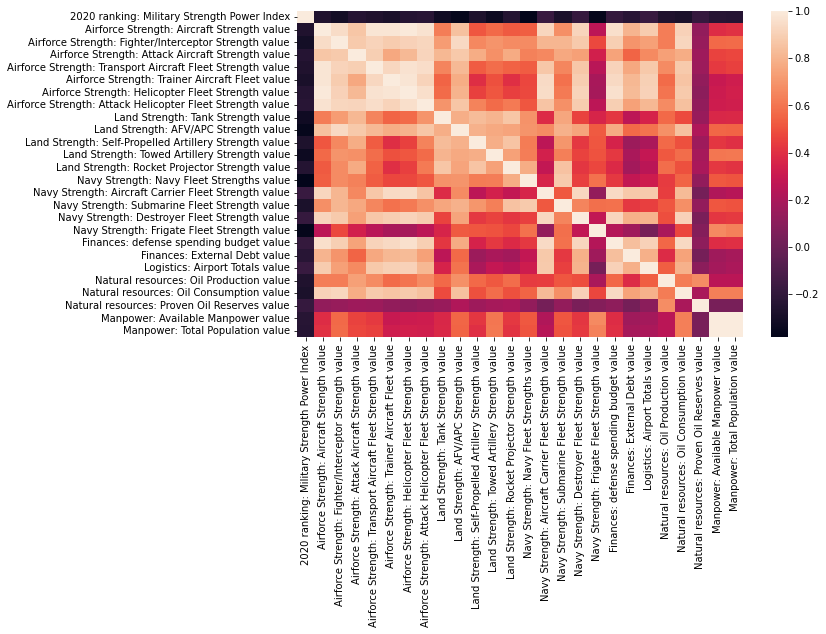

In [88]:
sns.heatmap(df.corr());

In [89]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
2020 ranking: Military Strength Power Index,138.0,1.460716e+00,1.324018e+00,6.060000e-02,5.748000e-01,1.034100e+00,2.021525e+00,1.016810e+01
Airforce Strength: Aircraft Strength value,138.0,3.884710e+02,1.231982e+03,0.000000e+00,3.300000e+01,1.110000e+02,2.902500e+02,1.326400e+04
Airforce Strength: Fighter/Interceptor Strength value,138.0,8.156522e+01,2.303248e+02,0.000000e+00,0.000000e+00,1.700000e+01,6.050000e+01,2.085000e+03
Airforce Strength: Attack Aircraft Strength value,138.0,2.576087e+01,9.452822e+01,0.000000e+00,0.000000e+00,0.000000e+00,1.575000e+01,7.420000e+02
Airforce Strength: Transport Aircraft Fleet Strength value,138.0,3.023188e+01,9.233044e+01,0.000000e+00,3.000000e+00,9.000000e+00,2.600000e+01,9.450000e+02
Airforce Strength: Trainer Aircraft Fleet value,138.0,8.283333e+01,2.408037e+02,0.000000e+00,4.250000e+00,2.600000e+01,7.925000e+01,2.643000e+03
Airforce Strength: Helicopter Fleet Strength value,138.0,1.540652e+02,5.201836e+02,0.000000e+00,1.525000e+01,4.400000e+01,1.267500e+02,5.768000e+03
Airforce Strength: Attack Helicopter Fleet Strength value,138.0,2.562319e+01,9.732609e+01,0.000000e+00,0.000000e+00,2.000000e+00,1.775000e+01,9.670000e+02
Land Strength: Tank Strength value,138.0,6.465652e+02,1.515464e+03,0.000000e+00,1.925000e+01,1.530000e+02,4.362500e+02,1.295000e+04
Land Strength: AFV/APC Strength value,138.0,2.485696e+03,5.410546e+03,0.000000e+00,2.502500e+02,7.345000e+02,2.000000e+03,3.925300e+04


# Data Preprocessing

In [98]:
from sklearn.preprocessing import StandardScaler, RobustScaler,MinMaxScaler
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
from sklearn.cluster import KMeans

In [99]:
X = df.drop(['Country'], axis=1)

In [100]:
X.shape

(138, 26)

# Modelling

## Hopkins Test 
#### Assess the clusterability of a dataset. A score between 0 and 1, a score around 0.5 express no clusterability, a score tending to 1 express an uniform distrubution so clustering can't be useful and  0 express  not an uniform distrubution hence clusterering can be useful.

In [101]:
#!pip install pyclustertend --user

In [102]:
from pyclustertend import hopkins

In [103]:
X.shape

(138, 26)

In [104]:
hopkins(X, X.shape[0])

0.07119369232896437

## Clustering with K-means

### Elbow Method 
### We use this method to find optimal k value by looking up to break point of graph. 

In [105]:
ssd = [] #sum squared distance

K = range(2,10)

for k in K:
    model = KMeans(n_clusters =k, random_state=47)
    model.fit(X)
    ssd.append(model.inertia_) # intertia: Distance from each sample to centroid of its cluster

Text(0.5, 1.0, 'elbow method')

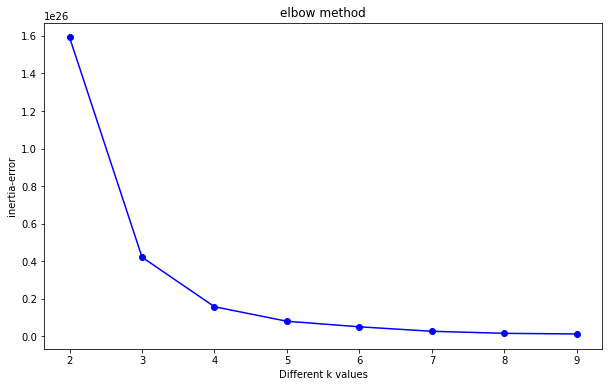

In [106]:
plt.plot(K, ssd, "bo-")
plt.xlabel("Different k values")
plt.ylabel("inertia-error") 
plt.title("elbow method") 

In [107]:
ssd # sum of squared distance

[1.591709282276745e+26,
 4.208693510098631e+25,
 1.5683101157453748e+25,
 7.956312589673094e+24,
 4.984308976164555e+24,
 2.6142676777381576e+24,
 1.5160985091134827e+24,
 1.1726889374325845e+24]

In [108]:
pd.Series(ssd).diff()

0             NaN
1   -1.170840e+26
2   -2.640383e+25
3   -7.726789e+24
4   -2.972004e+24
5   -2.370041e+24
6   -1.098169e+24
7   -3.434096e+23
dtype: float64

In [109]:
df_diff =pd.DataFrame(-pd.Series(ssd).diff()).rename(index = lambda x : x+1)
df_diff

,0
1,NaN
2,1.170840e+26
3,2.640383e+25
4,7.726789e+24
5,2.972004e+24
6,2.370041e+24
7,1.098169e+24
8,3.434096e+23


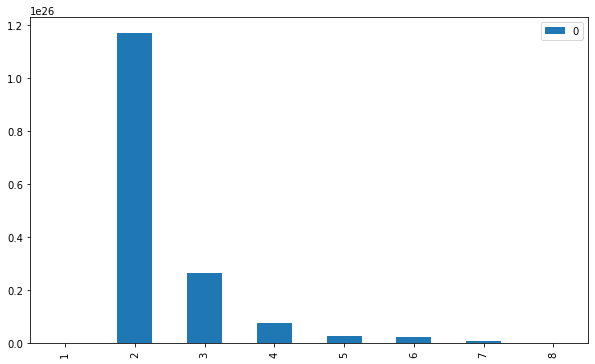

In [110]:
df_diff.plot(kind='bar');

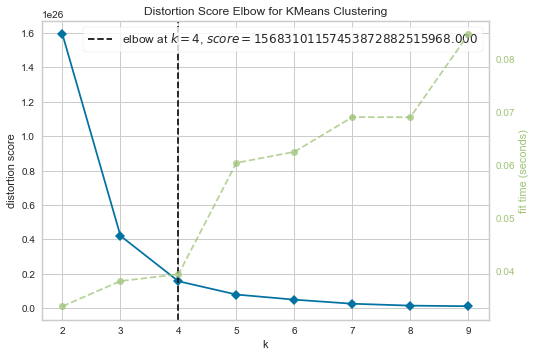

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [119]:
from yellowbrick.cluster import KElbowVisualizer

kmeans = KMeans()
visu = KElbowVisualizer(kmeans, k = (2,10))
visu.fit(X)
visu.poof()

# Silhouette analysis

In [117]:
from sklearn.metrics import silhouette_score

In [120]:
silhouette_score(X, kmeans.labels_)

0.7809562459591886

In [121]:
range_n_clusters = range(2,9)
for num_clusters in range_n_clusters:
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, random_state=47)
    kmeans.fit(X)
    cluster_labels = kmeans.labels_
    # silhouette score
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}")

For n_clusters=2, the silhouette score is 0.9227153206161361
For n_clusters=3, the silhouette score is 0.8995442950406763
For n_clusters=4, the silhouette score is 0.8671436271577667
For n_clusters=5, the silhouette score is 0.8675195540884064
For n_clusters=6, the silhouette score is 0.7789462746208773
For n_clusters=7, the silhouette score is 0.7817947547149927
For n_clusters=8, the silhouette score is 0.7847423624689158


### Model Building and label visualisation

In [122]:
model = KMeans(n_clusters=3)
model.fit(X)

KMeans(n_clusters=3)

In [123]:
model.inertia_

4.208693510098631e+25

In [124]:
model.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0,
       0, 0, 0, 0, 0, 0])

In [125]:
df['clusters'] = model.labels_

In [126]:
df.head()

,Country,2020 ranking: Military Strength Power Index,Airforce Strength: Aircraft Strength value,Airforce Strength: Fighter/Interceptor Strength value,Airforce Strength: Attack Aircraft Strength value,Airforce Strength: Transport Aircraft Fleet Strength value,Airforce Strength: Trainer Aircraft Fleet value,Airforce Strength: Helicopter Fleet Strength value,Airforce Strength: Attack Helicopter Fleet Strength value,Land Strength: Tank Strength value,...,Navy Strength: Frigate Fleet Strength value,Finances: defense spending budget value,Finances: External Debt value,Logistics: Airport Totals value,Natural resources: Oil Production value,Natural resources: Oil Consumption value,Natural resources: Proven Oil Reserves value,Manpower: Available Manpower value,Manpower: Total Population value,clusters
0,Afghanistan,1.3444,260.0,0.0,25.0,30.0,0.0,187.0,0.0,0.0,...,0.0,1.200000e+10,2.840000e+09,43.0,0.0,5500.0,0.000000e+00,14325743.0,34940837.0,0
1,Albania,2.3137,19.0,0.0,0.0,0.0,0.0,19.0,0.0,0.0,...,0.0,2.500000e+08,9.505000e+09,4.0,16000.0,42500.0,1.683000e+08,1519438.0,3057220.0,0
2,Algeria,0.4659,551.0,103.0,22.0,59.0,87.0,257.0,45.0,880.0,...,5.0,1.300000e+10,6.260000e+09,157.0,1306000.0,325000.0,1.220000e+10,20741263.0,41657488.0,0
3,Angola,0.8379,295.0,72.0,18.0,30.0,47.0,126.0,15.0,379.0,...,0.0,7.000000e+09,4.208000e+10,176.0,1666000.0,82300.0,8.273000e+09,6244205.0,30355880.0,0
4,Argentina,0.6521,227.0,24.0,7.0,9.0,64.0,100.0,0.0,370.0,...,0.0,4.200000e+09,2.149000e+11,1138.0,479400.0,685000.0,2.185000e+09,20179430.0,44694198.0,0


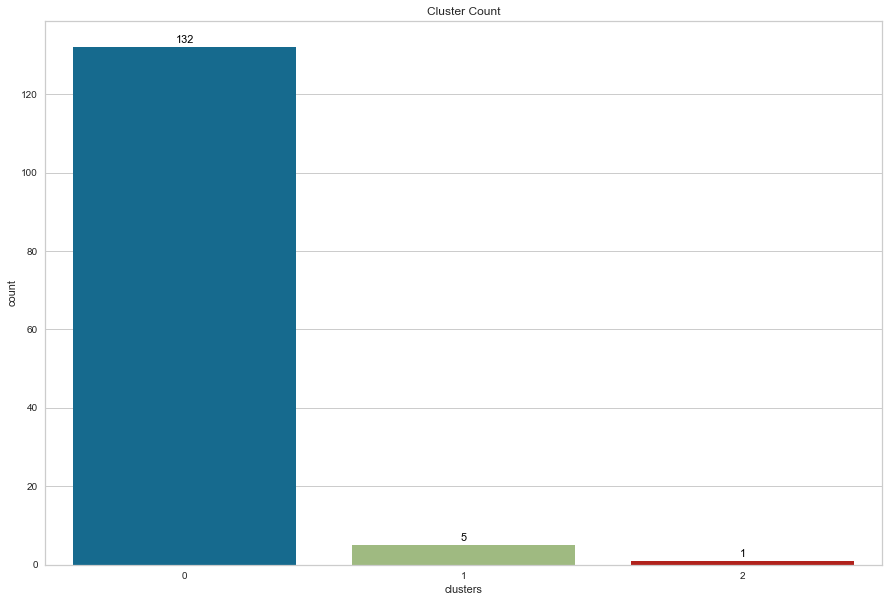

In [127]:
plt.figure(figsize=(15,10))
plt.title("Cluster Count")
ax1 = sns.countplot(x = df.clusters)

for p in ax1.patches:
    ax1.annotate(
        s=f"{p.get_height():1.0f}",
        xy=(p.get_x() + p.get_width() / 2., p.get_height()), 
        xycoords='data',
        ha='center', 
        va='center', 
        fontsize=11, 
        color='black',
        xytext=(0,7), 
        textcoords='offset points',
        clip_on=True,                   # <---  important
    )
plt.show();

In [128]:
df[df["clusters"] == 2]

,Country,2020 ranking: Military Strength Power Index,Airforce Strength: Aircraft Strength value,Airforce Strength: Fighter/Interceptor Strength value,Airforce Strength: Attack Aircraft Strength value,Airforce Strength: Transport Aircraft Fleet Strength value,Airforce Strength: Trainer Aircraft Fleet value,Airforce Strength: Helicopter Fleet Strength value,Airforce Strength: Attack Helicopter Fleet Strength value,Land Strength: Tank Strength value,...,Navy Strength: Frigate Fleet Strength value,Finances: defense spending budget value,Finances: External Debt value,Logistics: Airport Totals value,Natural resources: Oil Production value,Natural resources: Oil Consumption value,Natural resources: Proven Oil Reserves value,Manpower: Available Manpower value,Manpower: Total Population value,clusters
130,United States,0.0606,13264.0,2085.0,715.0,945.0,2643.0,5768.0,967.0,6289.0,...,0.0,7.500000e+11,1.791000e+13,13513.0,9352000.0,20000000.0,3.652000e+10,144872845.0,329256465.0,2


In [129]:
df[df["clusters"] == 1]

,Country,2020 ranking: Military Strength Power Index,Airforce Strength: Aircraft Strength value,Airforce Strength: Fighter/Interceptor Strength value,Airforce Strength: Attack Aircraft Strength value,Airforce Strength: Transport Aircraft Fleet Strength value,Airforce Strength: Trainer Aircraft Fleet value,Airforce Strength: Helicopter Fleet Strength value,Airforce Strength: Attack Helicopter Fleet Strength value,Land Strength: Tank Strength value,...,Navy Strength: Frigate Fleet Strength value,Finances: defense spending budget value,Finances: External Debt value,Logistics: Airport Totals value,Natural resources: Oil Production value,Natural resources: Oil Consumption value,Natural resources: Proven Oil Reserves value,Manpower: Available Manpower value,Manpower: Total Population value,clusters
40,France,0.1702,1229.0,269.0,0.0,121.0,187.0,589.0,62.0,528.0,...,11.0,4.150000e+10,5.360000e+12,464.0,15170.0,1600000.0,7.235000e+07,30111868.0,67364357.0,1
43,Germany,0.2186,712.0,128.0,74.0,71.0,26.0,386.0,56.0,245.0,...,9.0,5.000000e+10,5.326000e+12,539.0,43410.0,2500000.0,1.454000e+08,37010559.0,80457737.0,1
57,Japan,0.1501,1561.0,279.0,12.0,60.0,427.0,637.0,119.0,1004.0,...,0.0,4.900000e+10,3.240000e+12,175.0,3841.0,4000000.0,4.412000e+07,53873803.0,126168156.0,1
82,Netherlands,0.5919,168.0,61.0,1.0,4.0,27.0,75.0,28.0,18.0,...,6.0,1.241900e+10,4.063000e+12,29.0,18170.0,840000.0,1.132000e+08,7820960.0,17151228.0,1
129,United Kingdom,0.1717,733.0,133.0,15.0,44.0,241.0,312.0,49.0,227.0,...,13.0,5.510000e+10,8.126000e+12,460.0,910500.0,1600000.0,2.564000e+09,29948413.0,65105246.0,1


In [130]:
df[df["clusters"] == 0]

,Country,2020 ranking: Military Strength Power Index,Airforce Strength: Aircraft Strength value,Airforce Strength: Fighter/Interceptor Strength value,Airforce Strength: Attack Aircraft Strength value,Airforce Strength: Transport Aircraft Fleet Strength value,Airforce Strength: Trainer Aircraft Fleet value,Airforce Strength: Helicopter Fleet Strength value,Airforce Strength: Attack Helicopter Fleet Strength value,Land Strength: Tank Strength value,...,Navy Strength: Frigate Fleet Strength value,Finances: defense spending budget value,Finances: External Debt value,Logistics: Airport Totals value,Natural resources: Oil Production value,Natural resources: Oil Consumption value,Natural resources: Proven Oil Reserves value,Manpower: Available Manpower value,Manpower: Total Population value,clusters
0,Afghanistan,1.3444,260.0,0.0,25.0,30.0,0.0,187.0,0.0,0.0,...,0.0,1.200000e+10,2.840000e+09,43.0,0.0,5500.0,0.000000e+00,14325743.0,34940837.0,0
1,Albania,2.3137,19.0,0.0,0.0,0.0,0.0,19.0,0.0,0.0,...,0.0,2.500000e+08,9.505000e+09,4.0,16000.0,42500.0,1.683000e+08,1519438.0,3057220.0,0
2,Algeria,0.4659,551.0,103.0,22.0,59.0,87.0,257.0,45.0,880.0,...,5.0,1.300000e+10,6.260000e+09,157.0,1306000.0,325000.0,1.220000e+10,20741263.0,41657488.0,0
3,Angola,0.8379,295.0,72.0,18.0,30.0,47.0,126.0,15.0,379.0,...,0.0,7.000000e+09,4.208000e+10,176.0,1666000.0,82300.0,8.273000e+09,6244205.0,30355880.0,0
4,Argentina,0.6521,227.0,24.0,7.0,9.0,64.0,100.0,0.0,370.0,...,0.0,4.200000e+09,2.149000e+11,1138.0,479400.0,685000.0,2.185000e+09,20179430.0,44694198.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133,Venezuela,0.6449,260.0,38.0,0.0,52.0,82.0,86.0,10.0,390.0,...,4.0,7.450000e+08,1.003000e+11,444.0,2007000.0,575000.0,3.009000e+11,14260129.0,31689176.0,0
134,Vietnam,0.3559,293.0,77.0,0.0,38.0,36.0,138.0,25.0,2615.0,...,9.0,5.500000e+09,9.658000e+10,45.0,271400.0,525000.0,4.400000e+09,51043216.0,97040334.0,0
135,Yemen,1.2412,169.0,77.0,0.0,8.0,21.0,61.0,14.0,620.0,...,0.0,1.400000e+09,7.068000e+09,57.0,12260.0,145000.0,3.000000e+09,11266221.0,28667230.0,0
136,Zambia,1.6464,108.0,18.0,0.0,11.0,52.0,27.0,0.0,75.0,...,0.0,4.000000e+07,1.166000e+10,88.0,0.0,21000.0,0.000000e+00,6166905.0,16445079.0,0


### Evaluate 

In [131]:
from sklearn.metrics import silhouette_score

In [133]:
print(f'Silhouette Score(n=3): {silhouette_score(X, df.clusters)}')

Silhouette Score(n=3): 0.8995442950406763


In [134]:
range_n_clusters = range(2,9)
for num_clusters in range_n_clusters:
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, random_state=47)
    kmeans.fit(X)
    cluster_labels = kmeans.labels_
    # silhouette score
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}")

For n_clusters=2, the silhouette score is 0.9227153206161361
For n_clusters=3, the silhouette score is 0.8995442950406763
For n_clusters=4, the silhouette score is 0.8671436271577667
For n_clusters=5, the silhouette score is 0.8675195540884064
For n_clusters=6, the silhouette score is 0.7789462746208773
For n_clusters=7, the silhouette score is 0.7817947547149927
For n_clusters=8, the silhouette score is 0.7847423624689158


## Hierarchical Clustering

In [135]:
from scipy.cluster.hierarchy import dendrogram, linkage

### Dendogram

In [136]:
hc_ward = linkage(y = X, method = "ward")
hc_complete = linkage(X, "complete")
hc_average = linkage(X, "average")
hc_single = linkage(X, "single")

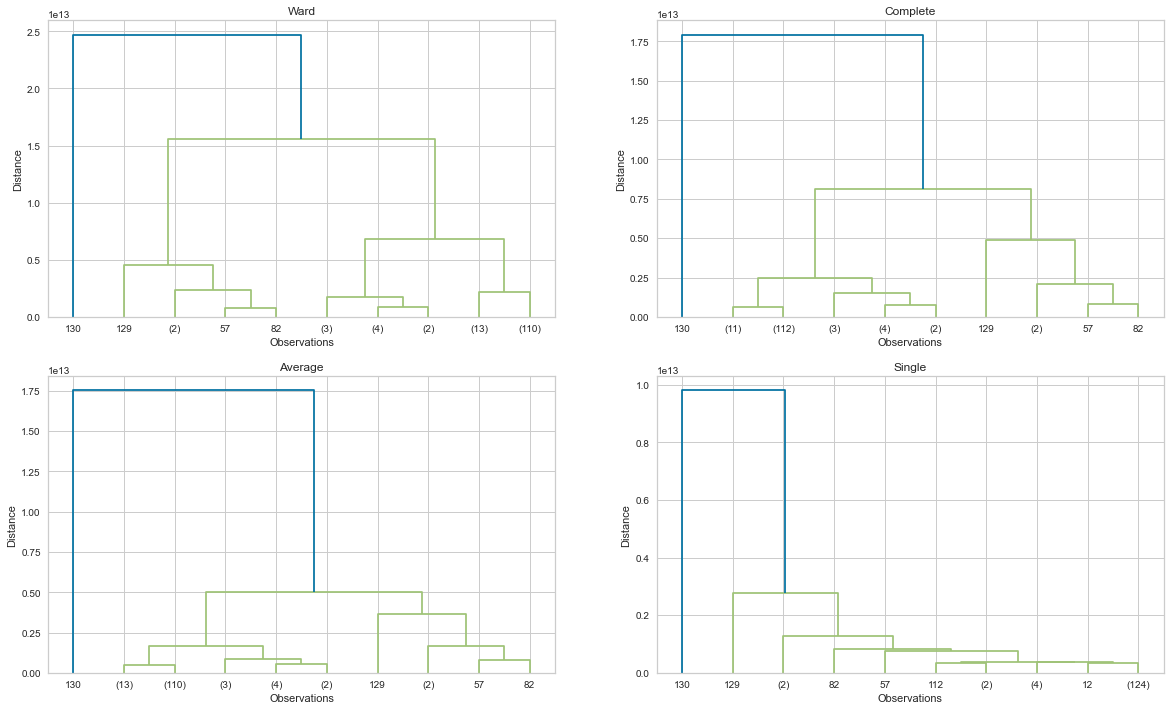

In [137]:
plt.figure(figsize = (20,12))

plt.subplot(221)
plt.title("Ward")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_ward, leaf_font_size = 10, truncate_mode='lastp', p=10)

plt.subplot(222)
plt.title("Complete")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_complete, leaf_font_size = 10, truncate_mode='lastp', p=10)

plt.subplot(223)
plt.title("Average")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_average, leaf_font_size = 10, truncate_mode='lastp', p=10)

plt.subplot(224)
plt.title("Single")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_single, leaf_font_size = 10, truncate_mode='lastp', p=10);

### Model Building and label visualisation

In [138]:
from sklearn.cluster import AgglomerativeClustering

In [139]:
model1 = AgglomerativeClustering(n_clusters=4, affinity = "euclidean", linkage = "ward")
model1.fit_predict(X)

array([2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 1, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 3, 2,
       2, 2, 2, 2, 2, 2], dtype=int64)

In [141]:
range_n_clusters = range(2,9)
for num_clusters in range_n_clusters:
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, random_state=47)
    kmeans.fit(X)
    cluster_labels = kmeans.labels_
    # silhouette score
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}")

For n_clusters=2, the silhouette score is 0.9227153206161361
For n_clusters=3, the silhouette score is 0.8995442950406763
For n_clusters=4, the silhouette score is 0.8671436271577667
For n_clusters=5, the silhouette score is 0.8675195540884064
For n_clusters=6, the silhouette score is 0.7789462746208773
For n_clusters=7, the silhouette score is 0.7817947547149927
For n_clusters=8, the silhouette score is 0.7847423624689158


In [142]:
df["cluster_1"] = model1.labels_

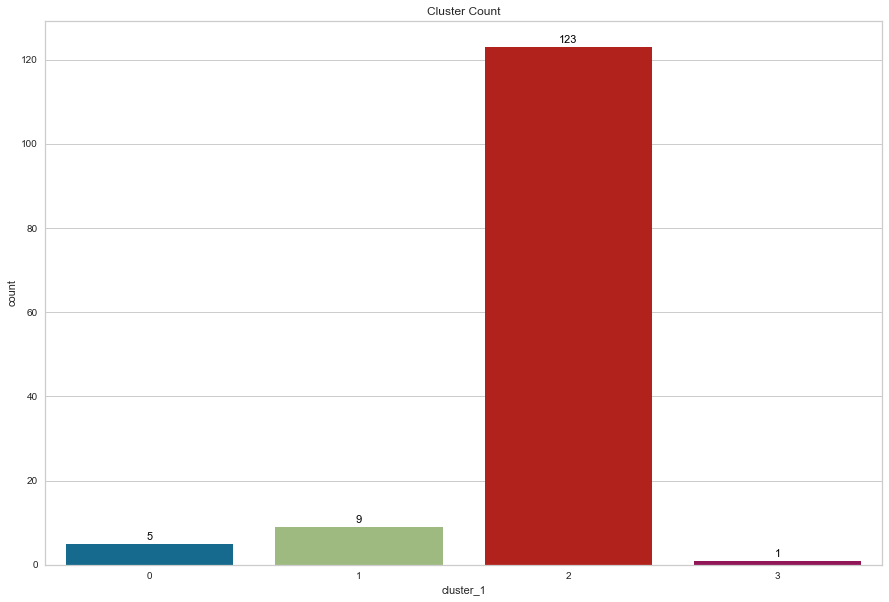

In [145]:
plt.figure(figsize=(15,10))
plt.title("Cluster Count")
ax1 = sns.countplot(x = df.cluster_1)

for p in ax1.patches:
    ax1.annotate(
        s=f"{p.get_height():1.0f}",
        xy=(p.get_x() + p.get_width() / 2., p.get_height()), 
        xycoords='data',
        ha='center', 
        va='center', 
        fontsize=11, 
        color='black',
        xytext=(0,7), 
        textcoords='offset points',
        clip_on=True,                   # <---  important
    )
plt.show();

In [148]:
df[df["cluster_1"] == 0]

,Country,2020 ranking: Military Strength Power Index,Airforce Strength: Aircraft Strength value,Airforce Strength: Fighter/Interceptor Strength value,Airforce Strength: Attack Aircraft Strength value,Airforce Strength: Transport Aircraft Fleet Strength value,Airforce Strength: Trainer Aircraft Fleet value,Airforce Strength: Helicopter Fleet Strength value,Airforce Strength: Attack Helicopter Fleet Strength value,Land Strength: Tank Strength value,...,Finances: defense spending budget value,Finances: External Debt value,Logistics: Airport Totals value,Natural resources: Oil Production value,Natural resources: Oil Consumption value,Natural resources: Proven Oil Reserves value,Manpower: Available Manpower value,Manpower: Total Population value,clusters,cluster_1
40,France,0.1702,1229.0,269.0,0.0,121.0,187.0,589.0,62.0,528.0,...,4.150000e+10,5.360000e+12,464.0,15170.0,1600000.0,7.235000e+07,30111868.0,67364357.0,1,0
43,Germany,0.2186,712.0,128.0,74.0,71.0,26.0,386.0,56.0,245.0,...,5.000000e+10,5.326000e+12,539.0,43410.0,2500000.0,1.454000e+08,37010559.0,80457737.0,1,0
57,Japan,0.1501,1561.0,279.0,12.0,60.0,427.0,637.0,119.0,1004.0,...,4.900000e+10,3.240000e+12,175.0,3841.0,4000000.0,4.412000e+07,53873803.0,126168156.0,1,0
82,Netherlands,0.5919,168.0,61.0,1.0,4.0,27.0,75.0,28.0,18.0,...,1.241900e+10,4.063000e+12,29.0,18170.0,840000.0,1.132000e+08,7820960.0,17151228.0,1,0
129,United Kingdom,0.1717,733.0,133.0,15.0,44.0,241.0,312.0,49.0,227.0,...,5.510000e+10,8.126000e+12,460.0,910500.0,1600000.0,2.564000e+09,29948413.0,65105246.0,1,0


In [149]:
df[df["cluster_1"] == 1]

,Country,2020 ranking: Military Strength Power Index,Airforce Strength: Aircraft Strength value,Airforce Strength: Fighter/Interceptor Strength value,Airforce Strength: Attack Aircraft Strength value,Airforce Strength: Transport Aircraft Fleet Strength value,Airforce Strength: Trainer Aircraft Fleet value,Airforce Strength: Helicopter Fleet Strength value,Airforce Strength: Attack Helicopter Fleet Strength value,Land Strength: Tank Strength value,...,Finances: defense spending budget value,Finances: External Debt value,Logistics: Airport Totals value,Natural resources: Oil Production value,Natural resources: Oil Consumption value,Natural resources: Proven Oil Reserves value,Manpower: Available Manpower value,Manpower: Total Population value,clusters,cluster_1
6,Australia,0.3225,464.0,82.0,6.0,38.0,174.0,133.0,22.0,59.0,...,2.630000e+10,1.714000e+12,480.0,263000.0,1005000.0,1.821000e+09,10808002.0,2.347014e+07,0,1
12,Belgium,1.0499,148.0,43.0,0.0,12.0,64.0,29.0,0.0,0.0,...,4.921000e+09,1.281000e+12,41.0,0.0,645000.0,0.000000e+00,4833107.0,1.157076e+07,0,1
22,Canada,0.3712,385.0,62.0,0.0,38.0,135.0,145.0,0.0,80.0,...,2.250000e+10,1.608000e+12,1467.0,3977000.0,2500000.0,1.697000e+11,16110865.0,3.588166e+07,0,1
26,China,0.0691,3210.0,1232.0,371.0,224.0,314.0,911.0,281.0,3500.0,...,2.370000e+11,1.598000e+12,507.0,3838000.0,13500000.0,2.562000e+10,752855402.0,1.384689e+09,0,1
53,Ireland,1.9481,19.0,0.0,0.0,0.0,8.0,8.0,0.0,0.0,...,8.700000e+08,2.470000e+12,40.0,0.0,145000.0,0.000000e+00,2366779.0,5.068050e+06,0,1
55,Italy,0.2111,860.0,99.0,110.0,38.0,185.0,439.0,59.0,200.0,...,2.780000e+10,2.444000e+12,129.0,77530.0,1300000.0,5.567000e+08,28011003.0,6.224667e+07,0,1
112,Spain,0.3388,512.0,137.0,12.0,46.0,162.0,162.0,19.0,327.0,...,1.510000e+10,2.094000e+12,150.0,2252.0,1226000.0,1.500000e+08,23136275.0,4.933108e+07,0,1
116,Sweden,0.5304,204.0,71.0,0.0,6.0,69.0,53.0,0.0,126.0,...,6.326924e+09,9.399000e+11,231.0,0.0,320000.0,0.000000e+00,4116808.0,1.004100e+07,0,1
117,Switzerland,0.5259,169.0,54.0,0.0,18.0,54.0,42.0,0.0,326.0,...,5.000000e+09,1.664000e+12,63.0,0.0,260000.0,0.000000e+00,3632250.0,8.292809e+06,0,1


In [150]:
df[df["cluster_1"] == 2]

,Country,2020 ranking: Military Strength Power Index,Airforce Strength: Aircraft Strength value,Airforce Strength: Fighter/Interceptor Strength value,Airforce Strength: Attack Aircraft Strength value,Airforce Strength: Transport Aircraft Fleet Strength value,Airforce Strength: Trainer Aircraft Fleet value,Airforce Strength: Helicopter Fleet Strength value,Airforce Strength: Attack Helicopter Fleet Strength value,Land Strength: Tank Strength value,...,Finances: defense spending budget value,Finances: External Debt value,Logistics: Airport Totals value,Natural resources: Oil Production value,Natural resources: Oil Consumption value,Natural resources: Proven Oil Reserves value,Manpower: Available Manpower value,Manpower: Total Population value,clusters,cluster_1
0,Afghanistan,1.3444,260.0,0.0,25.0,30.0,0.0,187.0,0.0,0.0,...,1.200000e+10,2.840000e+09,43.0,0.0,5500.0,0.000000e+00,14325743.0,34940837.0,0,2
1,Albania,2.3137,19.0,0.0,0.0,0.0,0.0,19.0,0.0,0.0,...,2.500000e+08,9.505000e+09,4.0,16000.0,42500.0,1.683000e+08,1519438.0,3057220.0,0,2
2,Algeria,0.4659,551.0,103.0,22.0,59.0,87.0,257.0,45.0,880.0,...,1.300000e+10,6.260000e+09,157.0,1306000.0,325000.0,1.220000e+10,20741263.0,41657488.0,0,2
3,Angola,0.8379,295.0,72.0,18.0,30.0,47.0,126.0,15.0,379.0,...,7.000000e+09,4.208000e+10,176.0,1666000.0,82300.0,8.273000e+09,6244205.0,30355880.0,0,2
4,Argentina,0.6521,227.0,24.0,7.0,9.0,64.0,100.0,0.0,370.0,...,4.200000e+09,2.149000e+11,1138.0,479400.0,685000.0,2.185000e+09,20179430.0,44694198.0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133,Venezuela,0.6449,260.0,38.0,0.0,52.0,82.0,86.0,10.0,390.0,...,7.450000e+08,1.003000e+11,444.0,2007000.0,575000.0,3.009000e+11,14260129.0,31689176.0,0,2
134,Vietnam,0.3559,293.0,77.0,0.0,38.0,36.0,138.0,25.0,2615.0,...,5.500000e+09,9.658000e+10,45.0,271400.0,525000.0,4.400000e+09,51043216.0,97040334.0,0,2
135,Yemen,1.2412,169.0,77.0,0.0,8.0,21.0,61.0,14.0,620.0,...,1.400000e+09,7.068000e+09,57.0,12260.0,145000.0,3.000000e+09,11266221.0,28667230.0,0,2
136,Zambia,1.6464,108.0,18.0,0.0,11.0,52.0,27.0,0.0,75.0,...,4.000000e+07,1.166000e+10,88.0,0.0,21000.0,0.000000e+00,6166905.0,16445079.0,0,2


In [151]:
df[df["cluster_1"] == 3]

,Country,2020 ranking: Military Strength Power Index,Airforce Strength: Aircraft Strength value,Airforce Strength: Fighter/Interceptor Strength value,Airforce Strength: Attack Aircraft Strength value,Airforce Strength: Transport Aircraft Fleet Strength value,Airforce Strength: Trainer Aircraft Fleet value,Airforce Strength: Helicopter Fleet Strength value,Airforce Strength: Attack Helicopter Fleet Strength value,Land Strength: Tank Strength value,...,Finances: defense spending budget value,Finances: External Debt value,Logistics: Airport Totals value,Natural resources: Oil Production value,Natural resources: Oil Consumption value,Natural resources: Proven Oil Reserves value,Manpower: Available Manpower value,Manpower: Total Population value,clusters,cluster_1
130,United States,0.0606,13264.0,2085.0,715.0,945.0,2643.0,5768.0,967.0,6289.0,...,7.500000e+11,1.791000e+13,13513.0,9352000.0,20000000.0,3.652000e+10,144872845.0,329256465.0,2,3
